In [1]:
!pip install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images (28x28 to 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to [0, 1] as each pixel has a value from 0-255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reduce dataset size to 10,000 (5000 for training, 5000 for testing)
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=5000, random_state=42, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=5000, random_state=42, stratify=y_test)

# Store accuracy values
k_values = range(2, 101)
accuracies = []

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Checking accuracy for each k- value, as k increases the accuracy decreases, it can analyzed that the most optimal k-value is k = 6, as the accuracy recorded is the highest
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'K={k}, Accuracy={accuracy:.4f}')



K=2, Accuracy=0.9234
K=3, Accuracy=0.9346
K=4, Accuracy=0.9342
K=5, Accuracy=0.9344
K=6, Accuracy=0.9310
K=7, Accuracy=0.9290
K=8, Accuracy=0.9314
K=9, Accuracy=0.9292
K=10, Accuracy=0.9278
K=11, Accuracy=0.9274
K=12, Accuracy=0.9252
K=13, Accuracy=0.9246
K=14, Accuracy=0.9228
K=15, Accuracy=0.9212
K=16, Accuracy=0.9190
K=17, Accuracy=0.9172
K=18, Accuracy=0.9146
K=19, Accuracy=0.9152
K=20, Accuracy=0.9146
K=21, Accuracy=0.9132
K=22, Accuracy=0.9134
K=23, Accuracy=0.9112
K=24, Accuracy=0.9100
K=25, Accuracy=0.9094
K=26, Accuracy=0.9084
K=27, Accuracy=0.9076
K=28, Accuracy=0.9054
K=29, Accuracy=0.9046
K=30, Accuracy=0.9056
K=31, Accuracy=0.9044
K=32, Accuracy=0.9024
K=33, Accuracy=0.9004
K=34, Accuracy=0.9012
K=35, Accuracy=0.9012
K=36, Accuracy=0.9016
K=37, Accuracy=0.9008
K=38, Accuracy=0.8986
K=39, Accuracy=0.8982
K=40, Accuracy=0.8974
K=41, Accuracy=0.8962
K=42, Accuracy=0.8954
K=43, Accuracy=0.8946
K=44, Accuracy=0.8944
K=45, Accuracy=0.8942
K=46, Accuracy=0.8932
K=47, Accuracy=0.8

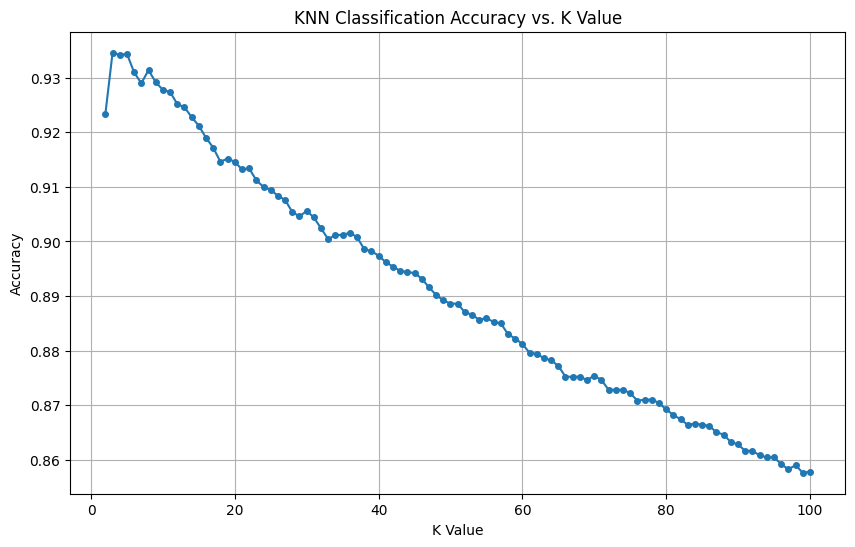

In [6]:
# Plot the accuracy vs. K-value graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', markersize=4)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Classification Accuracy vs. K Value')
plt.grid(True)

# Save and display the plot
plt.savefig('/content/accuracy_vs_k_plot.png')
plt.show()